<a href="https://colab.research.google.com/github/nsandlin1/EEG_Mining/blob/main/EEG_Mining_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link to data files: https://bbci.de/competition/iii/#data_set_v

# Setting up data files

### Refactor from ascii (.asc) to csv (.csv)

```
perl -i -pe 's/(?<=\d)   (?=\d)/,/g' train*
perl -i -pe 's/^   //g' train*

perl -i -pe 's/(?<=\d)  (?=\d)/,/g' test*
perl -i -pe 's/^  //g' test*

for FILENAME in *.asc; do mv "$FILENAME" "${FILENAME%.asc}"; done
for FILENAME in *; do mv "$FILENAME" "${FILENAME}.csv"; done
```

### Import files

In [2]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving train_subject1_psd01.csv to train_subject1_psd01.csv
Saving train_subject1_psd02.csv to train_subject1_psd02.csv
Saving train_subject1_psd03.csv to train_subject1_psd03.csv


In [33]:
# import files to pd dataframe
import pandas as pd
train_subject1_psd01 = pd.read_csv('train_subject1_psd01.csv', header=None)
train_subject1_psd02 = pd.read_csv('train_subject1_psd02.csv', header=None)
train_subject1_psd03 = pd.read_csv('train_subject1_psd03.csv', header=None)
train_subject1 = pd.concat([train_subject1_psd01, train_subject1_psd02, train_subject1_psd03])
# train_subject2_psd01 = pd.read_csv('train_subject2_psd01.csv', header=None)
# train_subject2_psd02 = pd.read_csv('train_subject2_psd02.csv', header=None)
# train_subject2_psd03 = pd.read_csv('train_subject2_psd03.csv', header=None)
# train_subject3_psd01 = pd.read_csv('train_subject3_psd01.csv', header=None)
# train_subject3_psd02 = pd.read_csv('train_subject3_psd02.csv', header=None)
# train_subject3_psd03 = pd.read_csv('train_subject3_psd03.csv', header=None)

            0         1         2         3         4         5         6   \
0     0.007078  0.008510  0.008965  0.009456  0.007059  0.003619  0.002691   
1     0.007314  0.007759  0.008703  0.013505  0.009723  0.004064  0.002077   
2     0.005489  0.008068  0.011557  0.011794  0.009637  0.001848  0.002049   
3     0.004330  0.007966  0.012403  0.008397  0.008170  0.001614  0.003196   
4     0.006131  0.006961  0.009469  0.008458  0.008450  0.003989  0.004373   
...        ...       ...       ...       ...       ...       ...       ...   
3563  0.005378  0.021897  0.015629  0.005701  0.005829  0.005092  0.006458   
3564  0.011204  0.027448  0.018074  0.001145  0.005749  0.007197  0.004847   
3565  0.012324  0.023424  0.015557  0.001648  0.005715  0.003925  0.004098   
3566  0.009649  0.015931  0.014669  0.005138  0.004929  0.000941  0.003063   
3567  0.008353  0.016679  0.014890  0.004376  0.004205  0.001352  0.002524   

            7         8         9   ...        87        88    

# Data Visualization

In [30]:
# view general statistics on attributes
train_subject1.describe()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
count,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,...,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000
mean,0.016992,0.021881,0.019270,0.007753,0.005548,0.004874,0.005299,0.005555,0.003700,0.002613,...,0.009948,0.008243,0.006883,0.005811,0.005122,0.004326,0.003711,0.003132,0.002654,4.296353
std,0.011033,0.020524,0.017561,0.005203,0.003749,0.003276,0.003823,0.004525,0.002577,0.001781,...,0.007147,0.005450,0.004623,0.003982,0.003391,0.002891,0.002515,0.002273,0.001912,2.212673
min,0.000311,0.000274,0.000390,0.000095,0.000089,0.000080,0.000100,0.000104,0.000052,0.000055,...,0.000349,0.000128,0.000181,0.000082,0.000135,0.000099,0.000007,0.000086,0.000045,2.000000
25%,0.008974,0.009065,0.007451,0.004033,0.002856,0.002499,0.002604,0.002467,0.001871,0.001326,...,0.005060,0.004215,0.003517,0.002904,0.002590,0.002227,0.001916,0.001536,0.001323,2.000000
50%,0.014535,0.015598,0.013502,0.006478,0.004668,0.004133,0.004410,0.004358,0.003060,0.002168,...,0.008252,0.007005,0.005844,0.004877,0.004352,0.003631,0.003122,0.002535,0.002178,3.000000
75%,0.022217,0.027028,0.024727,0.010200,0.007219,0.006347,0.006937,0.007299,0.004877,0.003439,...,0.012819,0.010937,0.009047,0.007740,0.006880,0.005753,0.004863,0.004118,0.003488,7.000000
max,0.101899,0.173874,0.129994,0.042825,0.029969,0.032507,0.039966,0.055250,0.026683,0.016210,...,0.079774,0.041423,0.039129,0.035559,0.024273,0.026113,0.020294,0.025330,0.015960,7.000000


<Axes: >

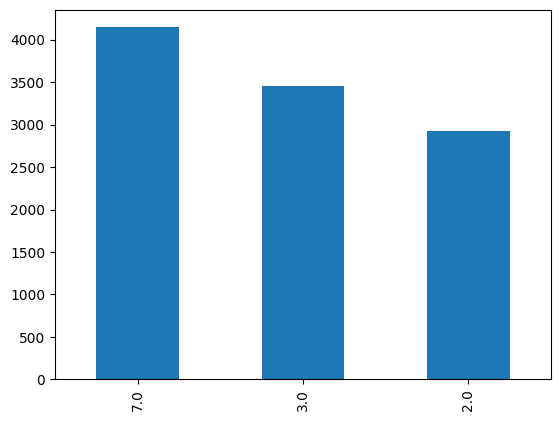

In [28]:
# view occurance of different actions
# actions are specified by column 97
train_subject1[96].value_counts().plot(kind='bar')

<Axes: xlabel='0'>

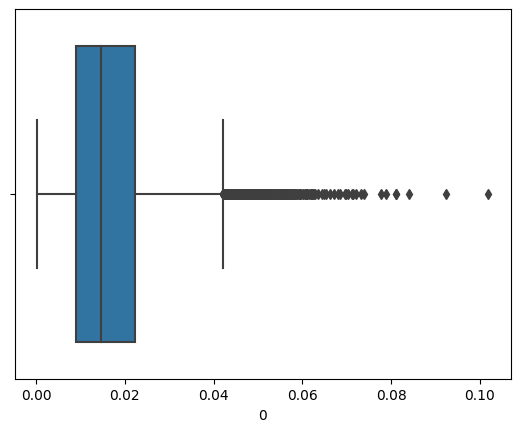

In [29]:
import seaborn as sns
sns.boxplot(data=train_subject1, x=0)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567],
           dtype='int64', length=10528)


<Axes: ylabel='0'>

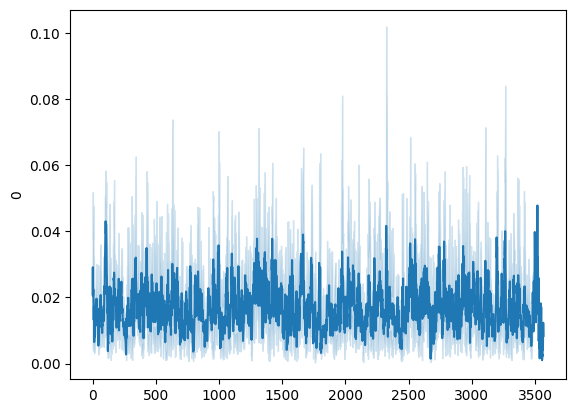

In [48]:
# print distribution of the first attribute accross all measurements (rows)
sns.lineplot(data=train_subject1, x=train_subject1.index, y=train_subject1[0])

# Preprocessing

In [ ]:
# function for checking nulls in df
def check_for_nulls(df, verbose=False):
  nulls = df.isnull().sum()

  if verbose:
    zeros = {}
    for key,value in nulls.items():
        zeros[key] = value
    return zeros
  else:
    return nulls

In [ ]:
check_for_nulls(train_subject1_psd01)

0     0
1     0
2     0
3     0
4     0
     ..
92    0
93    0
94    0
95    0
96    0
Length: 97, dtype: int64

### Analysis of Multicolinearity

In [ ]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

# Ideal cutoff is ~(5-10)
# TODO: make cutoff ranges into vector given min/max.
#       I think I am receiving low scores on reducted models
#       becuase I am excising too many attributes

from statsmodels.stats.outliers_influence import variance_inflation_factor

# dataframe for independent variables
independents = train_subject1_psd01[[i for i in range(0, 96)]]

# VIF dataframe
vifs = pd.DataFrame()

# calculate VIF for each attribute
vifs["VIF"] = [variance_inflation_factor(independents.values, i) for i in range(len(independents.columns))]

print(vifs[vifs.VIF < 6])
print(vifs[vifs.VIF > 15])

         VIF
0   5.502826
11  5.828397
23  5.756342
35  5.946383
95  5.186868
          VIF
25  20.390979


# Data Mining

In [4]:
from sklearn.model_selection import train_test_split

# define independent and dependent variable subsets for training
independents = train_subject1_psd01.drop(96, axis=1)
dependents = train_subject1_psd01[96]

# partition training and testing sets
ind_train, ind_test, dep_train, dep_test = train_test_split(independents, dependents, test_size=0.2)

### Linear Regression

In [52]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# train using all attributes
# instantiate the model
regr_all = linear_model.LinearRegression()

# regress
regr_all.fit(ind_train, dep_train)

# train using all attributes
dep_pred_all = regr_all.predict(ind_test)

print("all:")
# compute accuracy of model
print("Coefficients: \n", regr_all.coef_)
# mean squared error
print(f"MSE: {mean_squared_error(dep_test, dep_pred_all)}")
# coefficient of determination: 1 is perfect prediction
print(f"r^2: {r2_score(dep_test, dep_pred_all)}")

#####################################################
# Multicolinearity dimensionality reduction failed.
#####################################################

# train using attributes with low multicolinearity as per VIF
# those values with the lowest VIF, < 6, were columns 0, 11, 23, 35, & 95
# constrict training data to those attributes
ind_train_VIF_restricted = ind_train[[0, 11, 23, 35, 95]]
ind_test_VIF_restricted = ind_test[[0, 11, 23, 35, 95]]

# instantiate the model
regr_VIF_restricted = linear_model.LinearRegression()

# regress
regr_VIF_restricted.fit(ind_train_VIF_restricted, dep_train)

# train using restricted attributes
dep_pred_VIF_restricted = regr_VIF_restricted.predict(ind_test_VIF_restricted)

print("\nVIF restricted:")
# compute accuracy of model
print("Coefficients: \n", regr_VIF_restricted.coef_)
# mean squared error
print(f"MSE: {mean_squared_error(dep_test, dep_pred_VIF_restricted)}")
# coefficient of determination: 1 is perfect prediction
print(f"r^2: {r2_score(dep_test, dep_pred_VIF_restricted)}")


all:
Coefficients: 
 [4077189.69948997 4077177.90202378 4077150.42353395 4077224.00314492
 4077169.42855066 4077175.4188973  4077269.45766113 4077151.06321871
 4077207.07160439 4077215.82959222 4077217.82564418 4077121.98923147
 4077195.30837752 4077198.28576409 4077198.9769367  4077144.36880096
 4077157.11406067 4077233.13812478 4077109.13741524 4077292.46884147
 4077111.72686159 4077220.44453419 4077263.30856543 4077249.78047802
 4077190.28772503 4077181.89315586 4077194.44429285 4077170.26483775
 4077198.99492854 4077170.6224814  4077208.88619333 4077149.0041547
 4077230.3938714  4077165.58257124 4077172.81811437 4077127.68781503
 4077170.96640113 4077223.77101876 4077224.72565689 4077162.60626819
 4077161.77315311 4077187.7202501  4077157.09456745 4077224.42427778
 4077093.49148114 4077282.46806072 4077112.64908456 4077237.28743189
 4077180.34706335 4077220.05490936 4077181.35348853 4077190.68311238
 4077119.46195202 4077189.1624987  4077221.82335705 4077164.32009489
 4077034.44458



### Random Forest

acc: 0.9598853868194842


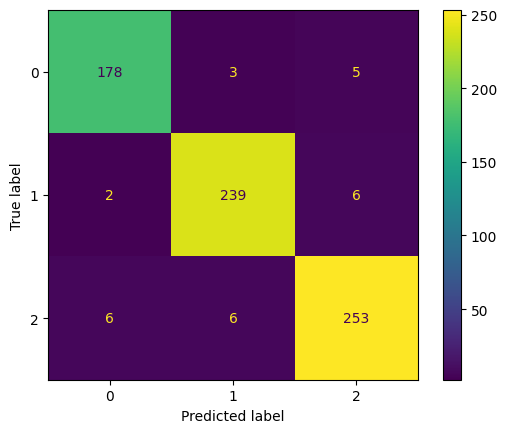

In [6]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# fit the random forest model
##### TODO: Hyperparameter tuning
rf = RandomForestClassifier()
rf.fit(ind_train, dep_train)

# inference
dep_pred = rf.predict(ind_test)

# compute accuracy
acc = accuracy_score(dep_test, dep_pred)
print(f"acc: {acc}")

# print confusion matrix
cm = confusion_matrix(dep_test, dep_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


### SVM

acc: 0.9828080229226361


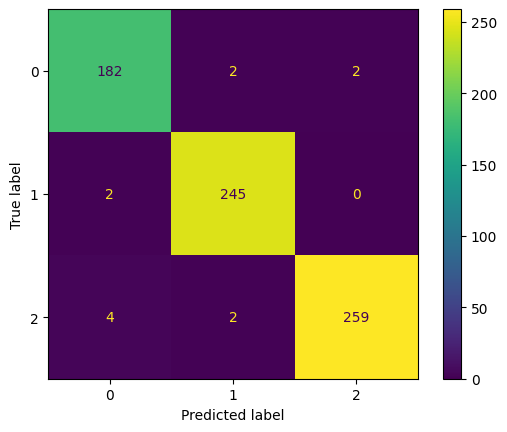

In [21]:
# https://holypython.com/svm/support-vector-machine-step-by-step/#google_vignette

from sklearn import svm

# instantiate svm
sup_vec_mach = svm.SVC(kernel='rbf', gamma=200)

# fit the SVM
sup_vec_mach.fit(ind_train, dep_train)

# inference
dep_pred = sup_vec_mach.predict(ind_test)

# compute accuracy
acc = accuracy_score(dep_test, dep_pred)
print(f"acc: {acc}")

# print confusion matrix
cm = confusion_matrix(dep_test, dep_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

### Quadratic Discrimination Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


acc: 0.9914040114613181
acc: 0.44269340974212035


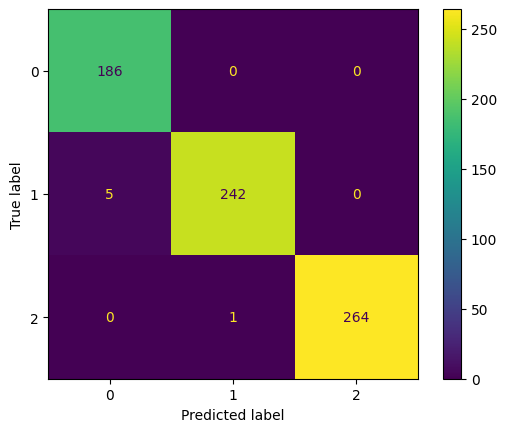

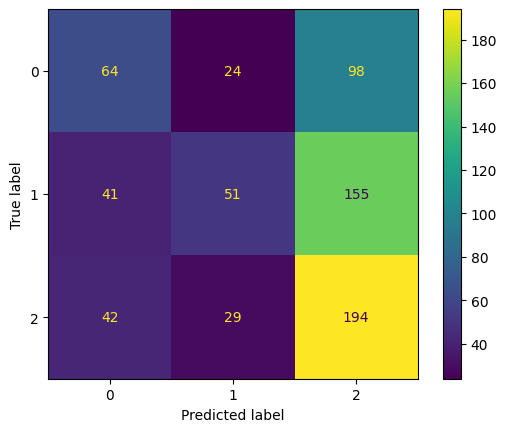

In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# without multicolinearity reductions

# define the quadratic discriminator
qd = QuadraticDiscriminantAnalysis()

# fit the model
qd.fit(ind_train, dep_train)

# get predictions
dep_pred = qd.predict(ind_test)

# compute accuracy
acc = accuracy_score(dep_test, dep_pred)
print(f"acc: {acc}")

# print confusion matrix
cm = confusion_matrix(dep_test, dep_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# with multicolinearity reductions

# define the quadratic discriminator
qdwmr = QuadraticDiscriminantAnalysis()

# fit the model
qdwmr.fit(ind_train_VIF_restricted, dep_train)

# get predictions
dep_pred_VIF_restricted = qdwmr.predict(ind_test_VIF_restricted)

# compute accuracy
acc = accuracy_score(dep_test, dep_pred_VIF_restricted)
print(f"acc: {acc}")

# print confusion matrix
cm = confusion_matrix(dep_test, dep_pred_VIF_restricted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()